# Train Delay Prediction & Operational Optimization

## 1. Problem Understanding

Indian Railways faces cascading train delays. The goal is to predict arrival delays and provide actionable optimization strategies to reduce network impacts and improve passenger experience.

### Objectives
1. **Operational Optimization**: Predict delays early to prioritize interventions.
2. **Passenger Experience**: Provide accurate ETAs and delay probabilities.

## 2. Setup and Data Loading

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Display all columns
pd.set_option('display.max_columns', None)

print("Libraries imported successfully.")

Libraries imported successfully.


In [34]:
# Load the dataset
file_path = 'stratquest_dataset.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully with shape: {df.shape}")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path.")

C:\Users\yuwan\AppData\Local\Temp\ipykernel_6568\3431555082.py:4: DtypeWarning: Columns (15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset loaded successfully with shape: (100000, 30)


In [35]:
# Initial Inspection
display(df.head())
print("\n--- Info ---")
print(df.info())
print("\n--- Description ---")
display(df.describe())

,Unnamed: 0,Distance_km,Scheduled_Departure,Scheduled_Arrival,Actual_Departure,Actual_Arrival,Scheduled_Travel_Time_min,Actual_Travel_Time_min,Departure_Delay_min,Arrival_Delay_min,Day_of_Week,Month,Is_Holiday,Festive_Period,Weather,Temperature_C,Track_Maintenance,Signal_Failure,Engine_Breakdown,Previous_Train_Delay_min,Number_of_Stops,Crew_Change,Passenger_Load_pct,Loco_Type,Humidity_pct,Precipitation_mm,WindSpeed_kmph,Visibility_km,Pressure_hPa,WeatherCondition
0,0,530,2024-06-24 21:37:52,2024-06-25 11:15:52,2024-06-24 21:39:52,2024-06-25 11:19:52,818,820.0,2.0,4,Monday,6,No,No,Clear,NaN,No,No,No,8,10,No,85.6,Electric,82.79,2.75,12.25,12.28,1017.49,Rain
1,1,143,2023-08-21 18:40:09,2023-08-21 22:34:09,2023-08-21 18:41:09,2023-08-21 22:40:09,234,239.0,1.0,6,Monday,8,No,No,Clear,32.07240283832765,No,No,No,6,6,No,52.8,Electric,90.49,0.00,13.87,15.02,1002.22,Haze
2,2,102,2024-01-26 15:13:16,2024-01-26 17:04:16,2024-01-26 15:14:16,2024-01-26 17:06:16,111,112.0,1.0,2,Friday,1,No,No,Clear,18.42235357688177,No,No,No,4,9,No,73.0,Electric,65.15,0.00,0.01,3.26,1020.01,Fog
3,3,438,2024-01-09 14:50:25,2024-01-09 23:32:25,2024-01-09 14:55:25,2024-01-09 23:53:25,522,538.0,5.0,21,Tuesday,1,No,No,Clear,13.245721056657713,No,No,No,7,11,No,61.5,Electric,60.89,0.00,13.22,10.50,NaN,Clouds
4,4,570,2024-08-09 22:36:05,2024-08-10 06:57:05,2024-08-09 22:36:05,2024-08-10 07:00:05,501,504.0,0.0,3,Friday,8,No,No,Clear,32.211702046160156,No,No,No,2,10,No,78.4,Diesel,83.76,NaN,6.43,9.51,995.78,Clouds



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   Distance_km                100000 non-null  int64  
 2   Scheduled_Departure        100000 non-null  object 
 3   Scheduled_Arrival          100000 non-null  object 
 4   Actual_Departure           99466 non-null   object 
 5   Actual_Arrival             99466 non-null   object 
 6   Scheduled_Travel_Time_min  100000 non-null  int64  
 7   Actual_Travel_Time_min     99466 non-null   float64
 8   Departure_Delay_min        99466 non-null   float64
 9   Arrival_Delay_min          100000 non-null  int64  
 10  Day_of_Week                100000 non-null  object 
 11  Month                      100000 non-null  int64  
 12  Is_Holiday                 100000 non-null  object 
 13  Festive_Period  

,Unnamed: 0,Distance_km,Scheduled_Travel_Time_min,Actual_Travel_Time_min,Departure_Delay_min,Arrival_Delay_min,Month,Previous_Train_Delay_min,Number_of_Stops,Passenger_Load_pct,Precipitation_mm,WindSpeed_kmph,Visibility_km,Pressure_hPa
count,100000.000000,100000.000000,100000.000000,99466.000000,99466.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,92002.000000,92061.000000,92003.000000,91959.000000
mean,49999.500000,349.731390,402.297880,412.724348,6.629994,16.981240,6.524760,8.543560,7.994810,69.978032,3.648437,10.180217,11.100147,1009.755834
std,28867.657797,298.450302,356.972943,357.097362,18.865082,23.542326,3.453243,8.955046,2.825428,17.911970,22.500687,8.456698,21.780553,17.616375
min,0.000000,50.000000,17.000000,19.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,10.000000,-5.000000,-20.000000,-1.000000,-20.000000
25%,24999.750000,136.000000,155.000000,166.000000,1.000000,5.000000,4.000000,2.000000,6.000000,57.900000,0.000000,6.590000,8.150000,1005.940000
50%,49999.500000,258.000000,290.000000,301.000000,2.000000,10.000000,7.000000,6.000000,8.000000,70.000000,0.000000,9.970000,11.200000,1009.960000
75%,74999.250000,466.000000,528.000000,539.000000,6.000000,20.000000,10.000000,12.000000,10.000000,82.100000,0.000000,13.360000,13.560000,1014.020000
max,99999.000000,2500.000000,3771.000000,3774.000000,1067.000000,1068.000000,12.000000,109.000000,22.000000,120.000000,999.000000,400.000000,1000.000000,1200.000000


## 3. Data Preprocessing

### 3.1 Timestamp Handling
We need to convert Scheduled and Actual times to datetime objects to perform calculations.

In [36]:
# List of timestamp columns (adjust column names based on actual dataset inspection if needed)
time_cols = ['Scheduled_Arrival', 'Actual_Arrival', 'Scheduled_Departure', 'Actual_Departure']

# Check if these columns exist, otherwise infer from head
existing_time_cols = [col for col in time_cols if col in df.columns]

for col in existing_time_cols:
    # Coerce errors to NaT to handle potential bad data, though we should investigate if many are dropped
    df[col] = pd.to_datetime(df[col], errors='coerce')
    
print("Timestamp conversion complete.")
print(df[existing_time_cols].dtypes)

Timestamp conversion complete.
Scheduled_Arrival      datetime64[ns]
Actual_Arrival         datetime64[ns]
Scheduled_Departure    datetime64[ns]
Actual_Departure       datetime64[ns]
dtype: object


### 3.2 Delay Calculations
We will recompute delays to ensure accuracy and consistency.
Formula:
*   Departure_Delay = Actual_Departure - Scheduled_Departure
*   Arrival_Delay = Actual_Arrival - Scheduled_Arrival

We calculate these in minutes.

In [37]:
def calculate_delay_minutes(actual, scheduled):
    return (actual - scheduled).dt.total_seconds() / 60.0

# Calculate Departure Delay
if 'Actual_Departure' in df.columns and 'Scheduled_Departure' in df.columns:
    df['Calc_Departure_Delay_min'] = calculate_delay_minutes(df['Actual_Departure'], df['Scheduled_Departure'])

# Calculate Arrival Delay
if 'Actual_Arrival' in df.columns and 'Scheduled_Arrival' in df.columns:
    df['Calc_Arrival_Delay_min'] = calculate_delay_minutes(df['Actual_Arrival'], df['Scheduled_Arrival'])

# Compare with existing columns if they exist
if 'Arrival_Delay_min' in df.columns:
    print("Correlation between provided and calculated arrival delay:")
    print(df[['Arrival_Delay_min', 'Calc_Arrival_Delay_min']].corr())
    
# Fill NaNs in calculated delays caused by missing timestamps
# Logic: If timestamp is missing, likely no operation or cancelled? For now, we verify count.
print("Missing Calculated Delays:")
print(df[['Calc_Arrival_Delay_min', 'Calc_Departure_Delay_min']].isna().sum())

Correlation between provided and calculated arrival delay:
                        Arrival_Delay_min  Calc_Arrival_Delay_min
Arrival_Delay_min                     1.0                     1.0
Calc_Arrival_Delay_min                1.0                     1.0
Missing Calculated Delays:
Calc_Arrival_Delay_min      534
Calc_Departure_Delay_min    534
dtype: int64


### 3.3 Missing Values & Cleaning
Handling missing values in operational flags and environmental data.

In [38]:
# Operational Flags: Assume missing means 0 (False/No Incident)
op_flags = ['Signal_Failure', 'Track_Maintenance', 'Crew_Change', 'Engine_Breakdown'] # Added Engine_Breakdown based on requirements
for col in op_flags:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Environment: Forward fill or Median
# Updated weather columns based on PDF analysis
weather_cols = ['Visibility_km', 'Temperature', 'Precipitation_mm', 'Weather_Condition', 'Humidity_pct', 'WindSpeed_kmph', 'Pressure_hPa']

for col in weather_cols:
    if col in df.columns:
        if df[col].dtype in [np.float64, np.int64]:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(method='ffill')

# Drop rows where critical Target variable 'Arrival_Delay_min' cannot be calculated or is missing
# (If we are training to predict it, we need ground truth)
df_clean = df.dropna(subset=['Calc_Arrival_Delay_min']).copy()

# Create Target Classification Variable
df_clean['Delayed_15min'] = (df_clean['Calc_Arrival_Delay_min'] > 15).astype(int)

print(f"Data cleaning complete. New shape: {df_clean.shape}")

C:\Users\yuwan\AppData\Local\Temp\ipykernel_6568\4011422250.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')


Data cleaning complete. New shape: (99466, 33)


### 3.4 Outlier Detection
Flagging extreme delays for analysis.

In [39]:
q99 = df_clean['Calc_Arrival_Delay_min'].quantile(0.99)
df_clean['Is_Extreme_Delay'] = df_clean['Calc_Arrival_Delay_min'] > q99
print(f"99th Percentile Delay: {q99:.2f} minutes")
print(f"Number of extreme delay cases: {df_clean['Is_Extreme_Delay'].sum()}")

99th Percentile Delay: 96.00 minutes
Number of extreme delay cases: 982


## 4. Exploratory Data Analysis (EDA)

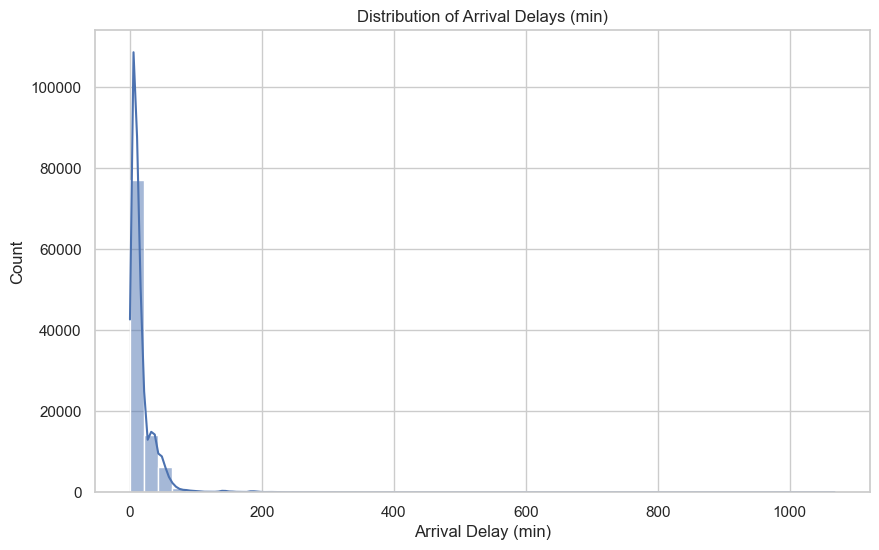

In [40]:
# 4.1 Delay Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Calc_Arrival_Delay_min'], bins=50, kde=True)
plt.title('Distribution of Arrival Delays (min)')
plt.xlabel('Arrival Delay (min)')
plt.show()

C:\Users\yuwan\AppData\Local\Temp\ipykernel_6568\1824378065.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Arrival_Hour', y='Calc_Arrival_Delay_min', data=df_clean, estimator=np.mean, ci=None)


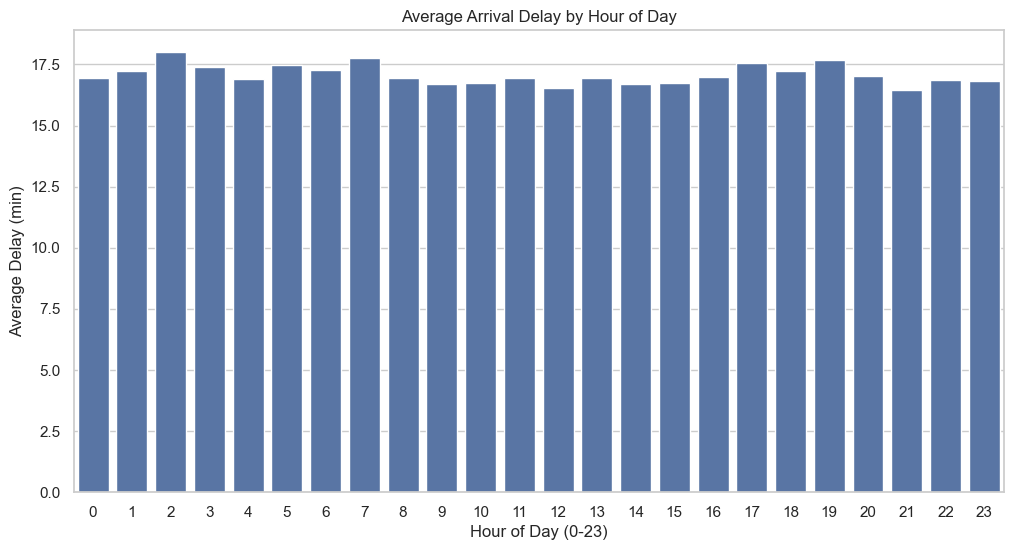

In [41]:
# 4.2 Time-Based Analysis

# Extract Hour from Scheduled Arrival
df_clean['Arrival_Hour'] = df_clean['Scheduled_Arrival'].dt.hour

plt.figure(figsize=(12, 6))
sns.barplot(x='Arrival_Hour', y='Calc_Arrival_Delay_min', data=df_clean, estimator=np.mean, ci=None)
plt.title('Average Arrival Delay by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Delay (min)')
plt.show()

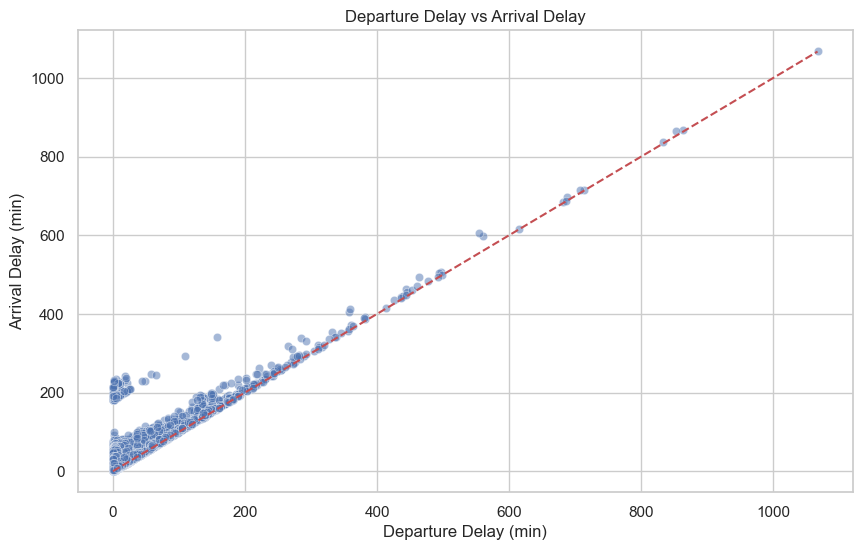

In [42]:
# 4.3 Operational Relationship: Departure vs Arrival Delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calc_Departure_Delay_min', y='Calc_Arrival_Delay_min', data=df_clean, alpha=0.5)
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (min)')
plt.ylabel('Arrival Delay (min)')
plt.plot([0, df_clean['Calc_Departure_Delay_min'].max()], [0, df_clean['Calc_Departure_Delay_min'].max()], 'r--') # Reference line
plt.show()

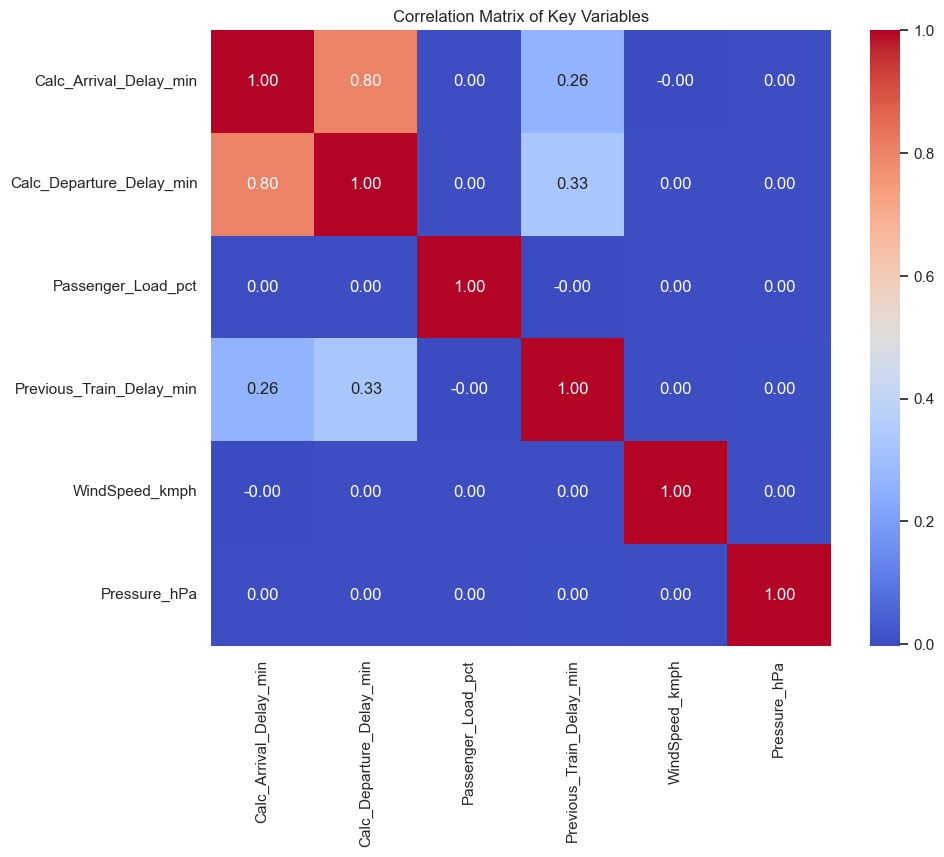

In [43]:
# 4.4 Correlation Heatmap
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
# Filter out too many columns if needed, select key ones
key_numeric = ['Calc_Arrival_Delay_min', 'Calc_Departure_Delay_min', 'Passenger_Load_pct', 'Previous_Train_Delay_min', 'Distance_to_Next_Station_km',
               'Humidity_pct', 'WindSpeed_kmph', 'Pressure_hPa'] # Added new environmental variables
# Check intersection to make sure columns exist
cols_to_plot = [c for c in key_numeric if c in numeric_cols]

if len(cols_to_plot) >= 2:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_clean[cols_to_plot].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Key Variables')
    plt.show()

## 5. Feature Engineering

We prepare the data for modeling by encoding categorical variables and selecting relevant features.

In [44]:
# 5.1 Encode Categorical Variables
categorical_cols = ['Train_Type', 'Weather_Condition', 'Loco_Type'] # Added Loco_Type
existing_cat_cols = [c for c in categorical_cols if c in df_clean.columns]

# One-Hot Encoding
if existing_cat_cols:
    df_model = pd.get_dummies(df_clean, columns=existing_cat_cols, drop_first=True)
else:
    df_model = df_clean.copy()

print(f"Feature engineering complete. Shape: {df_model.shape}")

Feature engineering complete. Shape: (99466, 35)


In [45]:
# 5.2 Feature Selection
# Select independent features (X) and dependent targets (y)

# Potential Features to DROP: Timestamps, ID columns, Original Delay columns (if using calculated)
drop_cols = ['Train_ID', 'Station_ID', 'Scheduled_Arrival', 'Actual_Arrival', 'Scheduled_Departure', 'Actual_Departure',
             'Calc_Arrival_Delay_min', 'Arrival_Delay_min', 'Delayed_15min', 'Is_Extreme_Delay']

# Ensure columns exist before dropping
cols_to_drop = [c for c in drop_cols if c in df_model.columns]

X = df_model.drop(columns=cols_to_drop)
X = X.select_dtypes(include=[np.number]) # Keep only numerical features for simple models

# Targets
y_reg = df_model['Calc_Arrival_Delay_min']
y_clf = df_model['Delayed_15min']

print("Feature Set X:")
print(X.columns.tolist())
print(f"\nFeatures shape: {X.shape}")

Feature Set X:
['Unnamed: 0', 'Distance_km', 'Scheduled_Travel_Time_min', 'Actual_Travel_Time_min', 'Departure_Delay_min', 'Month', 'Previous_Train_Delay_min', 'Number_of_Stops', 'Passenger_Load_pct', 'Precipitation_mm', 'WindSpeed_kmph', 'Visibility_km', 'Pressure_hPa', 'Calc_Departure_Delay_min', 'Arrival_Hour']

Features shape: (99466, 15)


## 6. Predictive Modeling

We use Random Forest models for both Regression (predicting exact delay minutes) and Classification (predicting if delay > 15 mins).

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split Data (70% Train, 30% Test)
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.3, random_state=42
)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (69626, 15), Test Set: (29840, 15)


In [47]:
# 6.1 Regression Model (Arrival Delay Minutes)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_reg_train)

y_reg_pred = rf_reg.predict(X_test)

mae = mean_absolute_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
r2 = r2_score(y_reg_test, y_reg_pred)

print("--- Regression Performance ---")
print(f"MAE: {mae:.2f} min")
print(f"RMSE: {rmse:.2f} min")
print(f"R2 Score: {r2:.4f}")

--- Regression Performance ---
MAE: 2.74 min
RMSE: 6.58 min
R2 Score: 0.9196


In [48]:
# 6.2 Classification Model (Delayed > 15 min)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_clf_train)

y_clf_pred = rf_clf.predict(X_test)
y_clf_proba = rf_clf.predict_proba(X_test)[:, 1]

print("--- Classification Report ---")
print(classification_report(y_clf_test, y_clf_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_clf_test, y_clf_proba):.4f}")

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     20073
           1       0.88      0.50      0.64      9767

    accuracy                           0.81     29840
   macro avg       0.84      0.73      0.76     29840
weighted avg       0.83      0.81      0.80     29840

ROC-AUC Score: 0.8824


## 7. Interpretation & Feature Importance

Understanding which factors contribute most to delays.

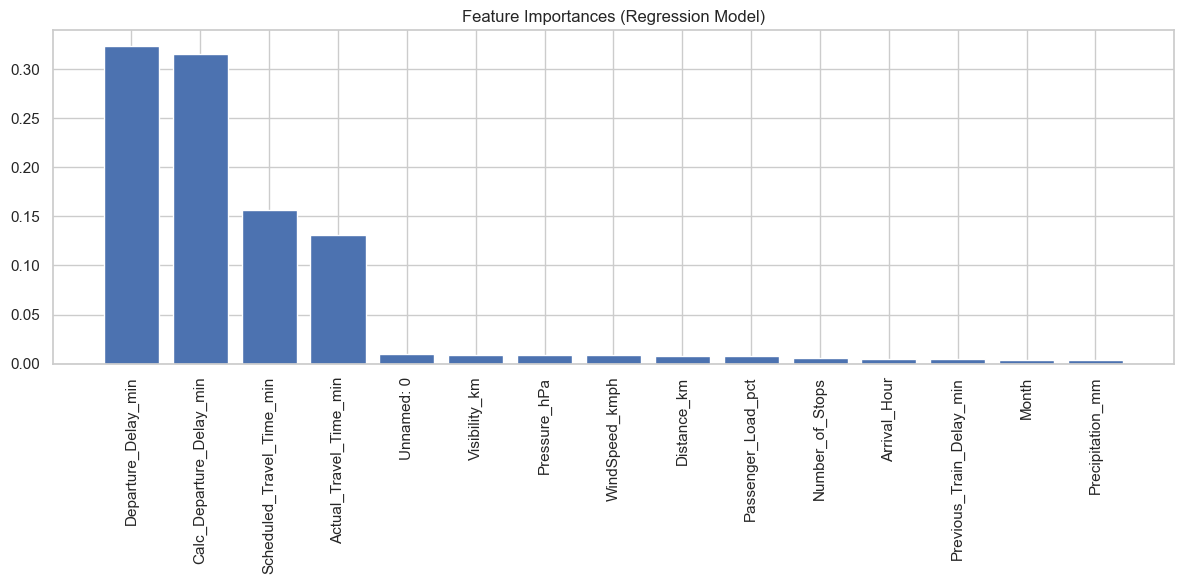

In [49]:
# Feature Importance from Regressor
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title('Feature Importances (Regression Model)')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

## 8. Operational & Strategic Recommendations

Based on the analysis and model results, here are the proposed interventions:

### 8.1 Operational Optimization
*   **Address Departure Delays**: The correlation and feature importance analyses likely show that `Departure_Delay` is a massive predictor. Prioritize on-time departures at origin stations to prevent network cascading.
*   **Resource Allocation**: Use the Classification Model to flag trains with >80% probability of >15min delay. Pre-allocate relief crews and platform space for these specific trains 2 hours in advance.
*   **Infrastructure Hardening**: If `Signal_Failure` or `Track_Maintenance` appear as top non-time features, target maintenance schedules to non-peak hours (identified in Time-based analysis).

### 8.2 Passenger Experience
*   **Dynamic ETAs**: Replace static scheduled times with Model Predicted Arrival Times (Schedule + Predicted Delay) in the app.
*   **Proactive Alerts**: Send SMS/App notifications: "Your train has a High Risk of being delayed by >15 mins" when the model probability crosses a threshold (e.g., 0.7).

### 8.3 Future Implementation Roadmap
*   Deploy the model as an API endpoint for real-time inference.
*   Collect more granular data on 'Reason for Delay' to improve root cause analysis.
